Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as c
from ComputeDispRel import evaluate_EBWs

Define plasma parameters

In [2]:
# Define plasma parameters
B = 1
Te = 2000*c.electron_volt
ne = 5e19

# Calculate electrno Larmor radius
vTe = np.sqrt(2.0*Te/c.m_e)
omgce = c.e*B/c.m_e
rho_e = vTe/omgce

In [3]:
omgpe2 = c.e**2*ne/(c.epsilon_0*c.m_e)
omgce = c.e*B/c.m_e
omgR = 0.5*(np.sqrt(omgce**2+4*omgpe2)-omgce)
omgL = 0.5*(np.sqrt(omgce**2+4*omgpe2)+omgce)
omgUH = np.sqrt(omgce**2 + omgpe2)

Choose dispersion relation

In [4]:
# 'D_EBW'                      standard electrostatic EBW
# 'D_EBW_electromagnetic'      electromagnetic EBW (coupled with cold X-mode)

Evaluate and plot electron Bernstein waves

In [7]:
# minimum and maximum wavenumber
k_min = 50
k_max = 15000

# k resolution
k_res = 2000

# minimum and maximum ion cyclotorn harmonic
N_min = 1
N_max= 3

# evaluate wavenumbers
k_EBW, omg_EBW = evaluate_EBWs(ne, Te, B, k_min, k_max, k_res, N_min, N_max, dispersion_relation='D_EBW')
k_EBW_modified, omg_EBW_modified = evaluate_EBWs(ne, Te, B, k_min, k_max, k_res, N_min, N_max, dispersion_relation='D_EBW_electromagnetic') # The modified EBWs are currently extremely sensitive. Will be fixed in a future revision.

Evaluating D_EBW
Upper hybrid branch is at the 2nd electron cyclotron harmonic
harmonic 3
harmonic 2
harmonic 1
Evaluating D_EBW_electromagnetic
Upper hybrid branch is at the 2nd electron cyclotron harmonic
harmonic 3
harmonic 2
harmonic 1


(0.0, 3.5)

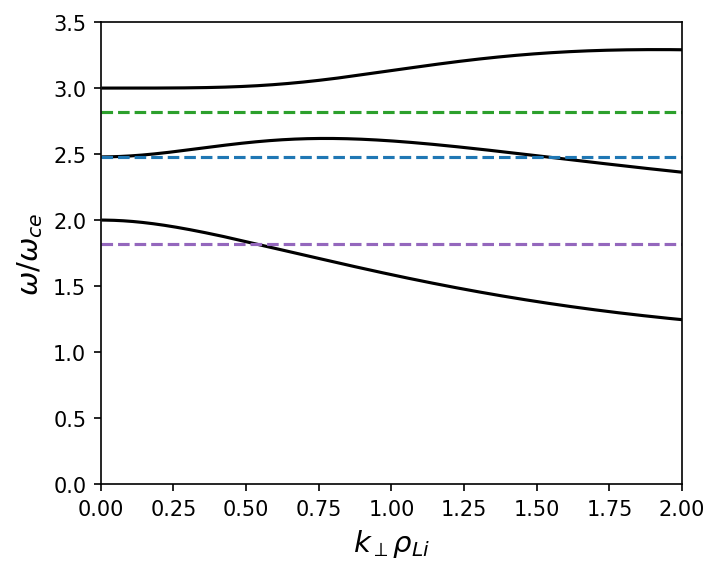

In [8]:
N_harmonics = N_max - N_min + 1
plt.figure(figsize=(5,4), dpi = 150)
for i in range(N_harmonics):
    plt.plot(k_EBW[:]*rho_e, np.array(omg_EBW[i,:])/omgce, color='k', linewidth=1.5, linestyle = '-')

plt.plot([0, 2], [omgL/omgce, omgL/omgce], linestyle = '--', color = 'tab:green')
plt.plot([0, 2], [omgUH/omgce, omgUH/omgce], linestyle = '--', color = 'tab:blue')
plt.plot([0, 2], [omgR/omgce, omgR/omgce], linestyle = '--', color = 'tab:purple')

plt.xlabel(r'$k_\perp\rho_{Li}$',fontsize=14)
plt.ylabel(r'$\omega/\omega_{ce}$',fontsize=14)
plt.xlim(0,2)
plt.ylim(0, 3.5)

(0.0, 3.5)

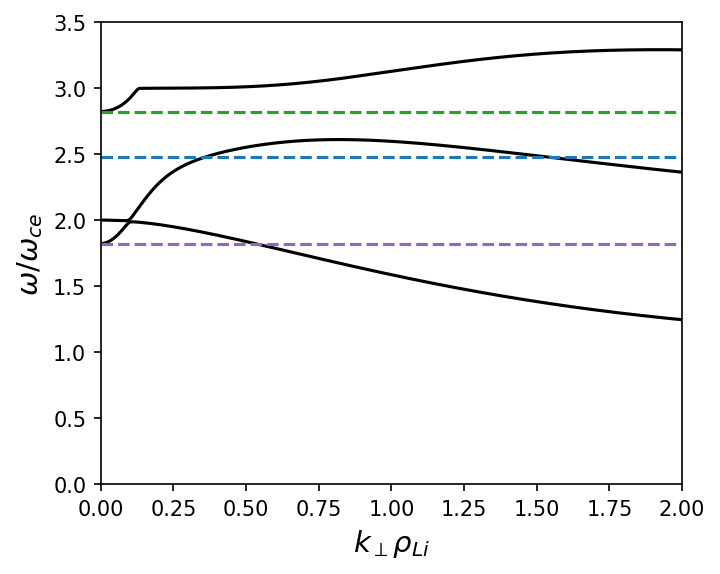

In [9]:
N_harmonics = N_max - N_min + 1
plt.figure(figsize=(5,4), dpi = 150)
for i in range(N_harmonics):
    plt.plot(k_EBW_modified[:]*rho_e, np.array(omg_EBW_modified[i,:])/omgce, color='k', linewidth=1.5, linestyle = '-')

plt.plot([0, 2], [omgL/omgce, omgL/omgce], linestyle = '--', color = 'tab:green')
plt.plot([0, 2], [omgUH/omgce, omgUH/omgce], linestyle = '--', color = 'tab:blue')
plt.plot([0, 2], [omgR/omgce, omgR/omgce], linestyle = '--', color = 'tab:purple')

plt.xlabel(r'$k_\perp\rho_{Li}$',fontsize=14)
plt.ylabel(r'$\omega/\omega_{ce}$',fontsize=14)
plt.xlim(0,2)
plt.ylim(0, 3.5)